# PCA "Eigenfaces" demo

Notebook from [Eric Elmoznino](https://github.com/EricElmoznino/lighthouse_dimensionality_reduction_tutorial).

Approach described in Sirovich and Kirby (1987)

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Import the LFW people image dataset from skleaern
faces = fetch_lfw_people(min_faces_per_person=60).data

#Examine shape of data
print(faces.shape)
pd.DataFrame(faces).head() #as a dataframe

(760, 2914)


,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,57.666668,64.000000,60.333332,59.666668,83.666664,108.333336,115.666664,120.333336,119.333336,118.666664,...,32.333332,41.333332,44.000000,34.333332,43.000000,98.000000,114.666664,49.333332,25.333334,29.000000
1,37.000000,60.000000,59.333332,65.000000,93.666664,103.666664,111.333336,119.333336,123.333336,127.000000,...,146.666672,197.666672,228.333328,236.333328,235.333328,233.000000,224.666672,223.333328,201.666672,139.666672
2,42.666668,29.666666,28.666666,84.333336,156.333328,189.333328,196.666672,198.333328,196.333328,197.000000,...,20.666666,21.000000,20.000000,21.000000,18.000000,18.333334,21.666666,22.666666,22.666666,29.000000
3,83.000000,94.666664,78.666664,73.000000,107.333336,123.666664,120.666664,125.000000,129.333328,133.666672,...,62.000000,135.666672,210.000000,241.000000,250.333328,249.333328,248.333328,241.000000,233.333328,230.666672
4,125.333336,137.333328,142.333328,133.000000,128.000000,127.333336,127.000000,129.333328,135.333328,142.000000,...,37.333332,26.666666,31.333334,36.666668,43.333332,52.666668,66.000000,70.333336,70.000000,66.666664


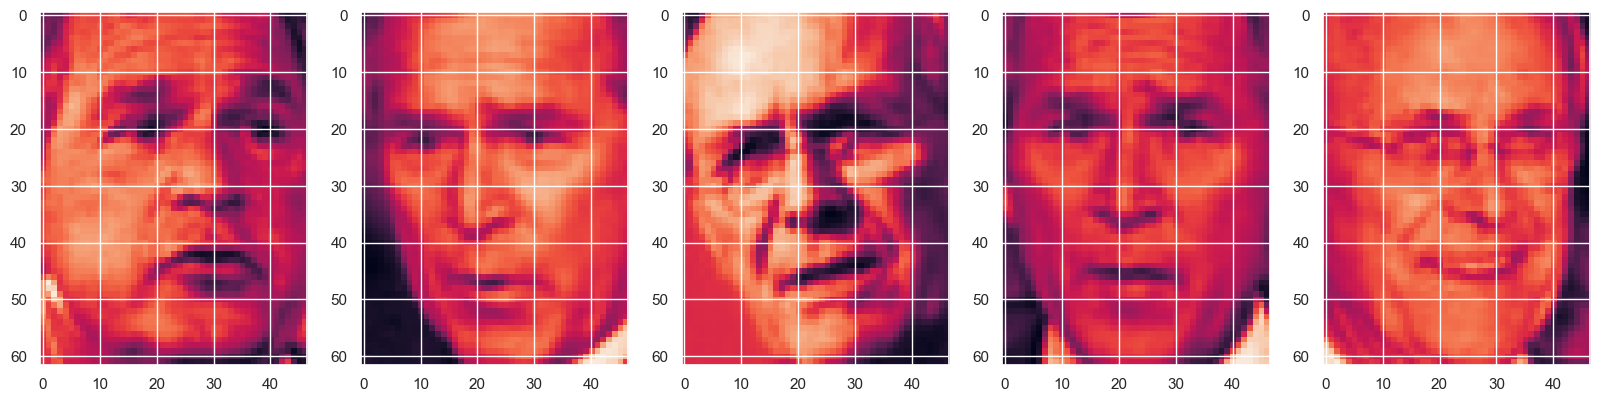

In [10]:
# Show the first 5 faces in the dataset
_, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(faces[i].reshape((62, 47))) #62x47 = 2914 features (contains grayscale value)

Text(0, 0.5, '% Cumulative explained variance')

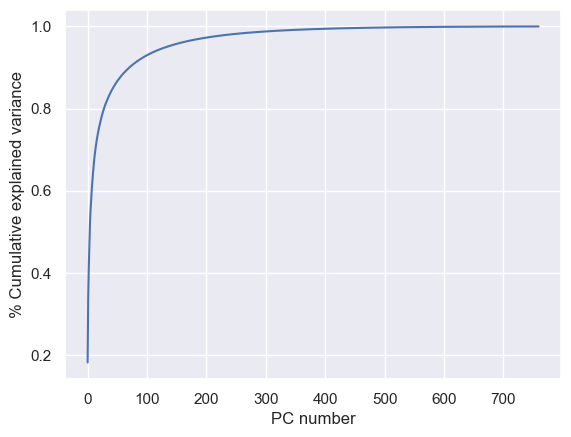

In [18]:
# Create cumulative explained variance graph
# Pretend we'd like to have about 90% explained variance
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(faces)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [21]:
# Find the first 100 principle components of the dataset
pca = PCA(n_components=100)
pca.fit(faces)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(faces)

print(reduced_faces.shape)
pd.DataFrame(reduced_faces).head() #as a dataframe

(760, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1683.761597,920.777771,-174.013092,119.419907,-583.931763,435.503876,-282.390411,-290.041382,-153.648544,-102.937889,...,18.304037,58.864727,-10.295630,112.228096,28.841133,-22.825821,31.951298,-136.326538,-11.502769,-15.926546
1,150.435837,-1229.101440,777.870789,-508.426270,-243.097076,-414.662659,365.332672,-87.583099,134.247971,3.588718,...,-26.999464,30.345184,-44.317165,20.836634,14.540932,-21.029121,28.423462,46.950558,-24.434761,23.885744
2,413.205933,1886.703857,234.477325,-212.901855,225.887939,-174.658264,466.812225,-185.833725,156.325165,187.449905,...,122.765823,25.971951,-5.257606,-65.705666,-38.040226,102.069061,-125.152336,21.881014,0.243487,-113.281082
3,413.468414,-335.492737,166.167328,-454.825653,-566.796509,59.901585,326.354340,473.604553,348.246185,-150.410248,...,18.096695,79.566010,49.638802,16.649454,64.661697,-17.465080,-43.306320,0.706327,15.189889,-1.535885
4,-154.879120,708.087402,279.145020,603.769653,-269.198608,-457.686401,12.778019,-196.392563,-198.506897,-234.477463,...,-53.120510,42.142960,47.183426,38.967754,32.207481,6.516806,9.498095,48.991676,-0.050832,-8.116035


Text(0, 0.5, '% Cumulative explained variance')

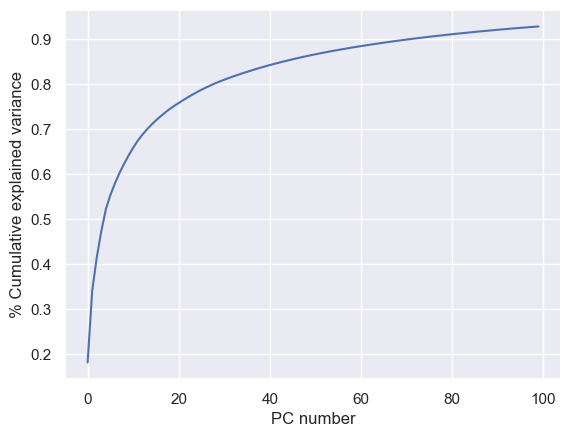

In [22]:
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

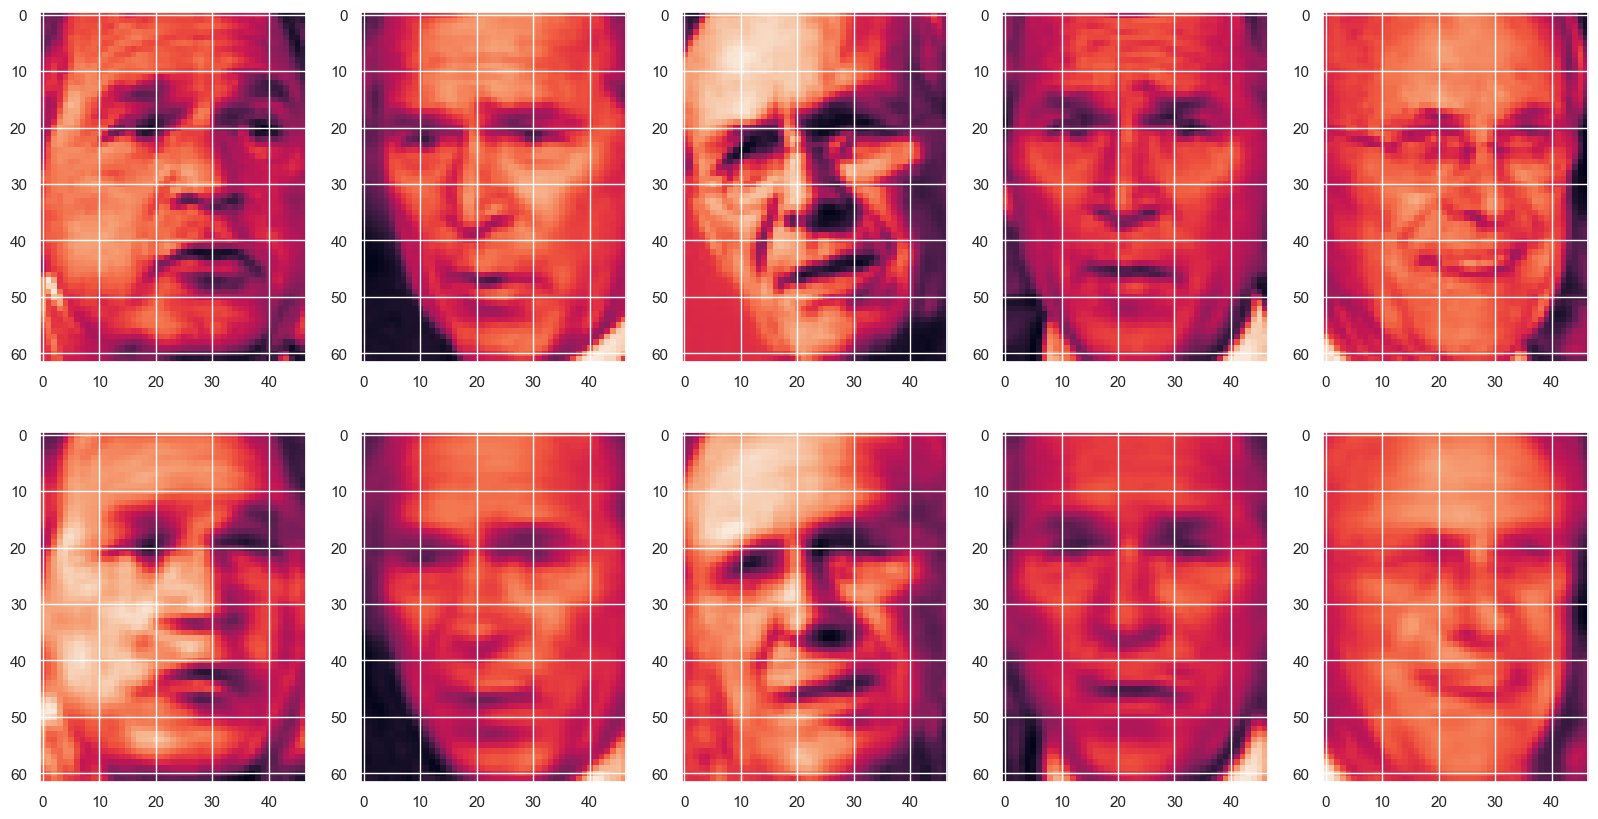

In [24]:
# See how much information the PCs preserve
reconstructed_faces = pca.inverse_transform(reduced_faces)

# Show the first 5 faces in the dataset and their reconstructions
_, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(5):
    axes[0, i].imshow(faces[i].reshape((62, 47)))
    axes[1, i].imshow(reconstructed_faces[i].reshape((62, 47)))

In [31]:
# Get the actual PCs from the sklearn PCA model
PCs = pca.components_
print('PC matrix shape: {}'.format(PCs.shape))
#print('PC matrix shape:',format(PCs.shape))
#print('PC matrix shape:', PCs.shape)
pd.DataFrame(PCs).head()

PC matrix shape: (100, 2914)


,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,-0.010331,-0.010670,-0.011047,-0.011269,-0.010987,-0.011151,-0.012677,-0.014649,-0.015340,-0.015317,...,-0.013987,-0.012655,-0.011114,-0.011307,-0.011023,-0.009095,-0.007302,-0.006417,-0.004650,-0.003238
1,0.016131,0.015778,0.015908,0.018270,0.021155,0.022518,0.022547,0.022380,0.022113,0.020795,...,-0.033808,-0.034903,-0.035912,-0.036570,-0.036532,-0.034465,-0.031421,-0.028588,-0.027087,-0.025799
2,-0.015244,-0.013657,-0.013474,-0.012593,-0.010835,-0.009142,-0.007301,-0.005238,-0.003066,-0.000992,...,-0.030266,-0.032744,-0.036150,-0.040022,-0.043539,-0.044673,-0.045473,-0.043055,-0.038324,-0.035287
3,-0.010492,-0.010388,-0.010325,-0.011200,-0.014247,-0.017573,-0.019522,-0.020727,-0.021798,-0.023265,...,-0.015280,-0.029759,-0.045162,-0.058997,-0.070944,-0.080161,-0.085037,-0.085251,-0.079419,-0.069934
4,0.023253,0.024490,0.026946,0.029569,0.030312,0.031684,0.031860,0.031096,0.030120,0.029449,...,-0.018010,-0.022813,-0.029875,-0.036175,-0.041040,-0.045256,-0.044744,-0.042951,-0.039390,-0.035230


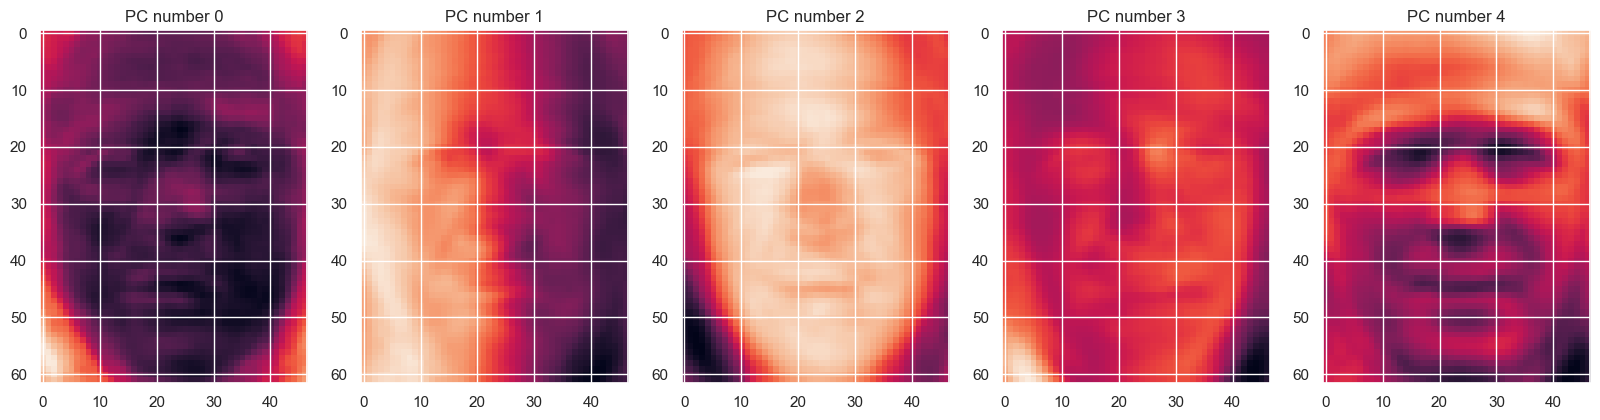

In [26]:
# Inspect the first 5 PCs
_, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(PCs[i].reshape((62, 47)))
    ax.set_title('PC number {}'.format(i))

### Our original features were image pixels. Our low-dimensional features (PCs) correspond to... face-related concepts!
This helps us learn what the important factors that describe faces (and how they primarily vary).

For example, individual PCs might correspond to:
- wide vs. narrow face
- eyes closed/open
- smiling/not smiling
- etc.

# Take-home exercise
Try and find out what PC 1 represents by finding images that have high values along it and other images that have low ones. Often, just inspecting the polarity of the PC can tell you what it does.